### Task 1 - Regresión lineal polinómica

#### Instrucciones: Usted usará Python a través de un Jupyter Notebook para llevar a cabo este ejercicio. Recuerde utilizar comentarios para describir lo que está haciendo en cada parte del proceso. Estará usando el juego de datos proporcionado dentro del portal. Al finalizar recuerde subir al portal un link a su repositorio en el que se pueda correr su notebook, usando https://mybinder.org/. El juego de datos proporcionado es parte de la plataforma Kaggle, dentro del cual se muestran los precios de casas en King County, Seattle. Este juego de datos incluye los precios de las casas vendidas entre mayo 2014 y mayo 2015. Nótese que el precio es dependiente de varias características como el número de habitaciones, número de baños, metros cuadrados de la sala, pisos, etc.

### Task 1.1 - Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un p.array para ser trabajado en el notebook.

In [1]:
#Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# leer el archivo CSV
data = np.genfromtxt('kc_house_data.csv', delimiter=',', skip_header=True)

data = np.array(data)

# imprimir la forma (shape) del arreglo
data

array([[         nan,          nan,  2.21900e+05, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [         nan,          nan,  5.38000e+05, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [         nan,          nan,  1.80000e+05, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [         nan,          nan,  4.02101e+05, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [         nan,          nan,  4.00000e+05, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [         nan,          nan,  3.25000e+05, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [2]:
#Mostramos el tamaño que tiene dicho array
data.size

453873

In [3]:
#Analizamos el shape del array
data.shape

(21613, 21)

In [4]:
#Imprimimos la cantidad de dimensiones que tiene el array
data.ndim

2

In [5]:
#Limpiamos los datos

#Empezamos quitando los Nan que se encuentran en dicho array
data = data[~np.isnan(data[:,2])]
data = data[~np.isnan(data[:,5])]

### Task 1.2 - Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living).

In [12]:
#Aplicamos el código visto en clase
norm = lambda v: (sum(v**2))**0.5
cost = lambda X, y, t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)

def linear_regression(X, y, t, cost, grad, a=0.1, n=1000, on_step=None): 
    costs = []
    for i in range(n):
        nabla = grad(X, y, t)
        
        t -= a * grad(X, y, t)
        costs.append(cost(X, y, t))

        if on_step:
            on_step(t)
    
    return t, costs

def gradient_descent(
    theta_0,
    cost_function,
    cost_function_gradient,
    learning_rate=0.01,
    threshold=0.001,
    max_iter=10000,
    params=[]
):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []

    while np.linalg.norm(cost_function_gradient(theta, *params)) > threshold and iteration < max_iter:
        iteration += 1
        theta -= learning_rate * cost_function_gradient(theta, *params)
        costs.append(cost_function(theta, *params))
        thetas.append(theta.copy())

    return theta, costs, thetas

def linear_cost(theta, X, y, lmbd):
    h = X @ theta
    reg = (lmbd / (2 * len(X))) * (theta[1:] ** 2).sum()
    return ((h - y) ** 2).sum() / (2 * len(X)) + reg


def linear_cost_gradient(theta, X, y, lmbd):
    h = X @ theta
    theta_copy = theta.copy()
    theta_copy[0] = 0
    reg_prime = lmbd * theta_copy / len(X)
    return ((X.T @ (h - y)) / len(X)) + reg_prime

Price: [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
Sqft_living: [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Valor de la matriz Xr: [[1.00000e+00 2.21900e+05]
 [1.00000e+00 5.38000e+05]
 [1.00000e+00 1.80000e+05]
 ...
 [1.00000e+00 4.02101e+05]
 [1.00000e+00 4.00000e+05]
 [1.00000e+00 3.25000e+05]]
Valor de la matriz Xr: [[1.00000e+00 2.21900e+05]
 [1.00000e+00 5.38000e+05]
 [1.00000e+00 1.80000e+05]
 ...
 [1.00000e+00 4.02101e+05]
 [1.00000e+00 4.00000e+05]
 [1.00000e+00 3.25000e+05]]
Valor de theta_init: [[0.36635389]
 [0.7104728 ]]
Valor de theta_init limpio: [0.36635389 0.7104728 ]


C:\Users\barre\AppData\Local\Temp\ipykernel_20592\3992827482.py:3: RuntimeWarning: overflow encountered in square
  cost = lambda X, y, t: ((X @ t - y) ** 2).sum() / len(y)
C:\Users\barre\AppData\Local\Temp\ipykernel_20592\3992827482.py:4: RuntimeWarning: overflow encountered in matmul
  grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)
C:\Users\barre\AppData\Local\Temp\ipykernel_20592\3992827482.py:11: RuntimeWarning: invalid value encountered in subtract
  t -= a * grad(X, y, t)


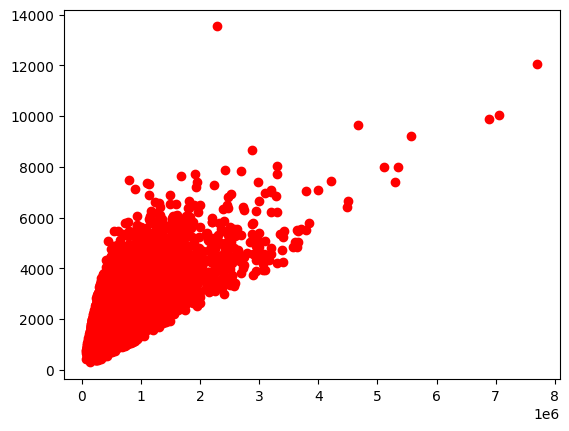

In [13]:

# Seleccionar las columnas de interés de los datos
X = data[:, 2].reshape(-1, 1)  # Todas las filas, columna 2
Y = data[:, 5].reshape(-1, 1)  # Todas las filas, columna 5

#Imprimimos los valroes de X e Y
print("Price: " + str(X))
print("Sqft_living: " + str(Y))

Xr = np.hstack((
    np.ones((len(X), 1)),
    X.reshape((len(X), 1))
))

#Calculamos el Xr visto en clase
Xr = np.hstack((np.ones((len(X), 1)), X.reshape(-1, 1)))

print("Valor de la matriz Xr: " + str(Xr))

#Se le hace un reshape a la matriz Xr
Xr = Xr.reshape(-1, 2)

#Se imprime el valor de la matriz Xr
print("Valor de la matriz Xr: " + str(Xr))

#Calculamos el valor de teta inicial
theta_init = np.random.rand(Xr.shape[1],1)

#Imprimimos los valores de theta_init
print("Valor de theta_init: " + str(theta_init))

#Para prevenir, limpiaremos los valores de theta_init para que no tena nulos
theta_init = theta_init[~np.isnan(theta_init)]

#Imprimimos los valores de theta_init ya limpio
print("Valor de theta_init limpio: " + str(theta_init))

#Le hacemos un reshape a nuestro theta_init
theta_init = theta_init.reshape(-1, 1)

thetaf, cost = linear_regression(
    Xr,
    Y,
    theta_init,
    cost,
    grad,
    a=0.025,
    n=100  
)

#Calculamos el valor de xm
xm = np.array([[0], [len(X)]])
#Calculamos el valor de xmr
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

#Graficamos los resultados 
plt.plot(Xr[:,1], Y, 'ro')
plt.plot(xm, xmr @ thetaf)
plt.show()



### Task 1.3 Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase).

Price: [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
Sqft_living: [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Valor de theta_init: [[0.]]
Valor de X_mean: [540088.14176653]
Valor de X_std: [367118.70318137]
Valor de X normalizado: [[-0.86671733]
 [-0.00568792]
 [-0.98084935]
 ...
 [-0.37586519]
 [-0.38158814]
 [-0.58588173]]


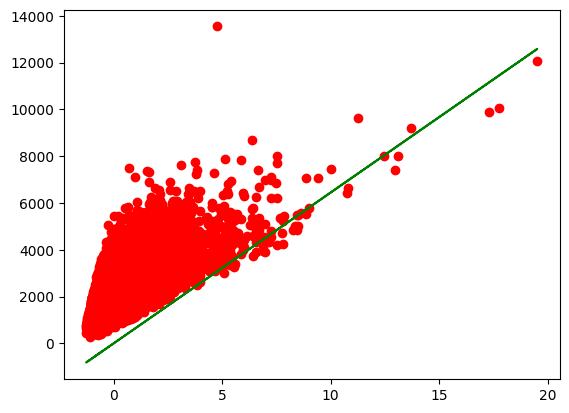

In [24]:
# Seleccionar las columnas de interés de los datos
X = data[:, 2].reshape(-1, 1)  # Todas las filas, columna 2
Y = data[:, 5].reshape(-1, 1)  # Todas las filas, columna 5

#Imprimimos los valroes de X e Y
print("Price: " + str(X))
print("Sqft_living: " + str(Y))

# Obtener el tamaño m x n de nuestra X
m, n = X.shape

# Inicializamos theta inicial
theta_init = np.zeros((n, 1))

#Imprimimos los valores de theta_init
print("Valor de theta_init: " + str(theta_init))

# Normalizar los datos en X
X_mean = np.mean(X, axis=0)  # Calcular la media de cada columna de X
X_std = np.std(X, axis=0)  # Calcular la desviación estándar de cada columna de X
X = (X - X_mean) / X_std  # Normalizar X

# Imprimir los valores de X_mean
print("Valor de X_mean: " + str(X_mean))

# Imprimir los valores de X_std
print("Valor de X_std: " + str(X_std))

# Imprimir los valores de X normalizado
print("Valor de X normalizado: " + str(X))

theta, costs, thetas = gradient_descent(
    theta_init,
    linear_cost,
    linear_cost_gradient,
    learning_rate=0.05,
    threshold=0.001,
    max_iter=1000,
    params=[X,Y, 0.1]
)

#Realizamos el for
"""for test_theta in thetas:
    pass"""

plt.scatter(X[:, 0], Y, color='red')
plt.plot(X[:, 0], X @ theta, color='green')
plt.show()

### Task 1.4 Usando cross validation determine el grado del polinomio